In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [2]:
 # 灰度化
def gray(img_path):
    """
    Calculate function:
    Gray(i,j) = 0.299 * R(i,j) + 0.587 * G(i,j) + 0.114 * B(i,j)
    """
    # 读取图片
    img = plt.imread(img_path)
    # 转换成 RGB 格式
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # 灰度化
    img_gray = np.dot(img_rgb[...,:3], [0.299, 0.587, 0.114])
        
    return img_gray

In [3]:
run "cannyClass.ipynb"

In [4]:
def edge_detection(img_gray):
    canny = Canny()
    new_gray = canny.smooth(img_gray)
    dx, dy, M, _ = canny.gradients(new_gray)
    NMS = canny.NMS(M, dx, dy)
    DT = canny.double_threshold(NMS) 
    return DT

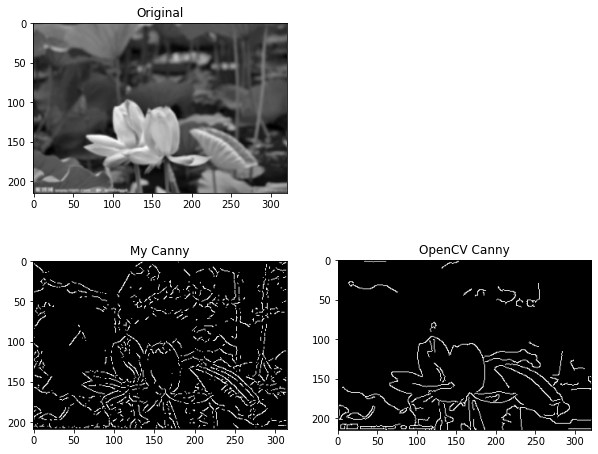

In [5]:
# 与OpenCV结果进行对比
plt.figure(figsize=(10, 8))

# 原图
img = cv2.imread('image\h.png') 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title("Original")
plt.imshow(img_gray, cmap="gray")

# 自己算法的结果
DT = edge_detection(img_gray)
plt.subplot(223)
plt.title("My Canny")
plt.imshow(DT, cmap="gray")

# OpenCV 的结果
cv_edges = cv2.Canny(img_gray, 100, 200)
plt.subplot(224)
plt.title("OpenCV Canny")
plt.imshow(cv_edges, cmap="gray")